In [14]:
import PIL.Image as Image
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

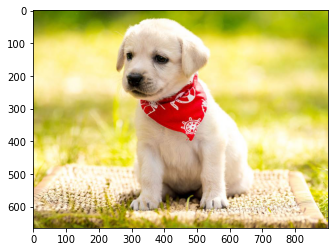

In [7]:
img0 = cv2.imread(imagepath)
im_rgb = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)  #convert to RGB
plt.imshow(im_rgb)
plt.show()

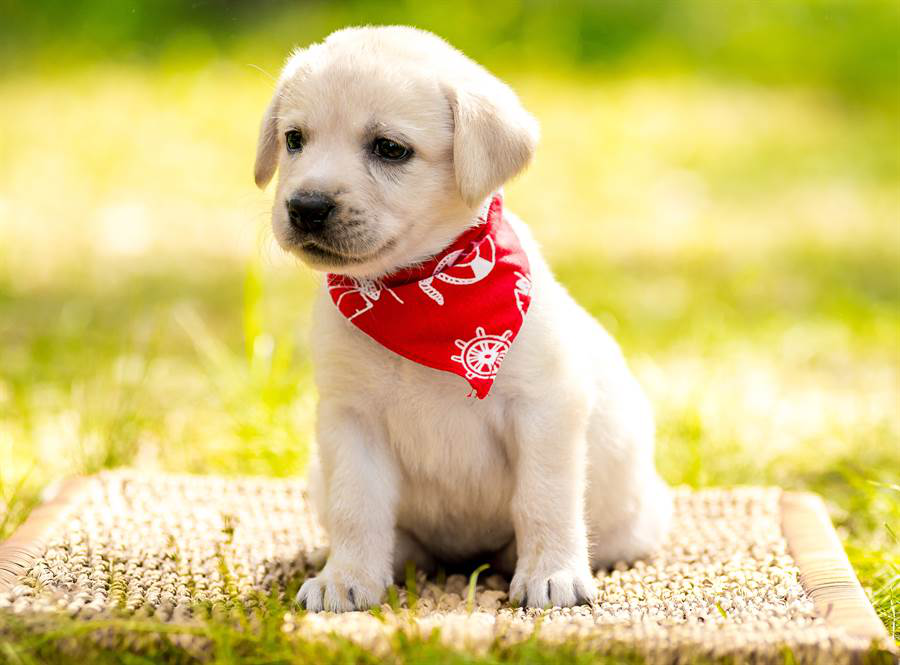

In [38]:
#load image
imagepath='D:/dog.png'
img_pil = Image.open(imagepath, mode='r')
img_pil = img_pil.convert('RGB')
img_pil

In [ ]:
#Convert to nparray
img_np = np.asarray(img_pil)

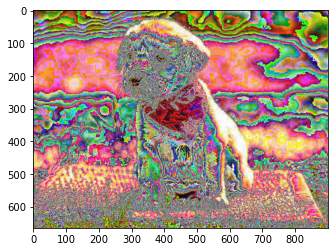

In [33]:
#Normalize

mean = [0.5, 0.5, 0.5]
std = [0.1, 0.1, 0.1]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std), 
    transforms.ToPILImage() 
])

img_pil_normal = transform(img_pil)
plt.imshow(img_pil_normal)
plt.show()

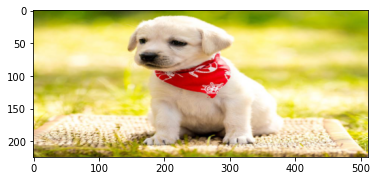

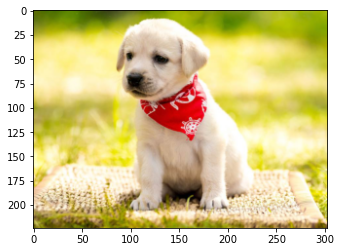

In [17]:
#Resize
size = (224, 512)
transform = transforms.Resize(size)
resize_img = transform(img_pil)
plt.imshow(resize_img)
plt.show()

size = 224
transform =  transforms.Resize(size)
resize_img = transform(img_pil)
plt.imshow(resize_img)
plt.show()

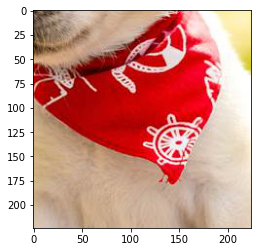

In [18]:
#Center Crop
size = 224
transform =  torchvision.transforms.CenterCrop(size)
cc_img = transform(img_pil)
plt.imshow(cc_img)
plt.show()



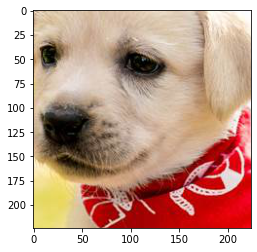

In [19]:
size=224
transform = transforms.Compose([
    transforms.RandomCrop(size)
])

rc_img = transform(img_pil)
plt.imshow(rc_img)
plt.show()

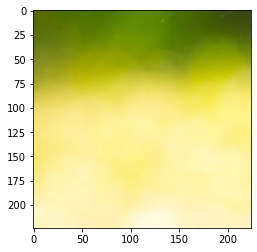

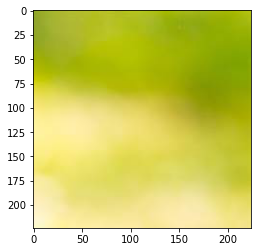

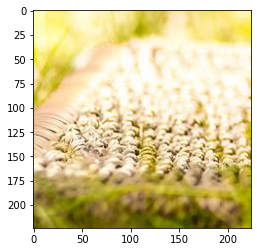

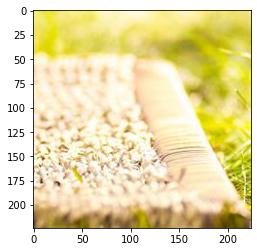

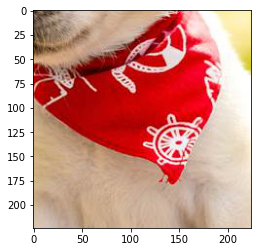

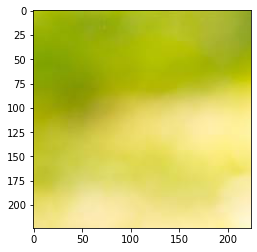

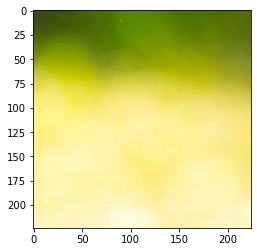

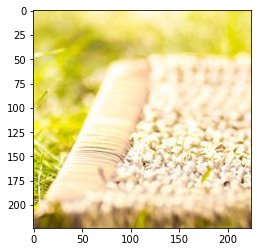

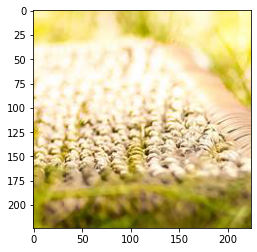

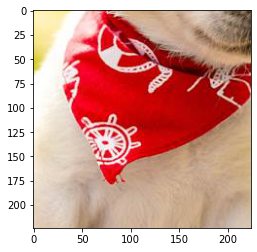

In [25]:
#Ten Crop
size=224
transform = transforms.TenCrop(size, vertical_flip=False)
tc_img = transform(img_pil)

for img in tc_img:
    plt.imshow(img)
    plt.show()

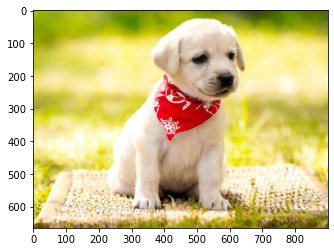

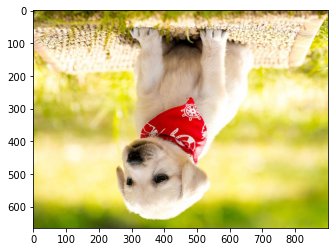

In [29]:
#Random Flip
transform = transforms.RandomHorizontalFlip(p = 0.5)  #p = 0.5 represents half of the data in the dataset wont be flipped
h_img = transform(img_pil)
plt.imshow(h_img)
plt.show()

transform = transforms.RandomVerticalFlip(p = 0.5)
v_img = transform(img_pil)
plt.imshow(v_img)
plt.show()




c:\Users\Lin\.conda\envs\pytorch_gpu\lib\site-packages\torchvision\transforms\transforms.py:1293: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed 0.14. "


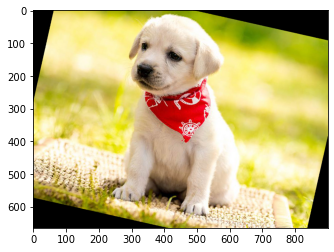

In [41]:
#Random Rotation
degree = 45

transform = transforms.RandomRotation(degrees=degree, resample=Image.BICUBIC, expand=False)

# transform = transforms.RandomRotation(degrees=degree)
r_img = transform(img_pil)
plt.imshow(r_img)
plt.show()


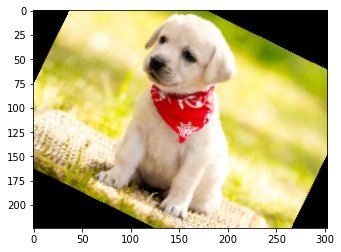

In [40]:
degree = 45
size = 224

transform_set = [ 
             transforms.Resize(size), 
             transforms.RandomHorizontalFlip(),
             transforms.RandomRotation(degree),
             transforms.ColorJitter()
]

transform = transforms.Compose([
    transforms.RandomApply(transform_set, p=1) #p can convert
])

new_img = transform(img_pil)
plt.imshow(new_img)
plt.show()